**Name - Aniket Choudhary**
---
**GRIP @The Sparks Foundation**
> **Data Science Task 2 - Explore Unsupervised Machine Learning(iris dataset)**

>**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

>**loading Iris data set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/My Drive/GRIP/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


>**Getting Data**

In [ ]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

>**Data Preprocessing**

In [ ]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


>**Divide the data into inputs and labels**

In [ ]:
X= df.drop('Species',axis=1)
y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


>**Visualization**

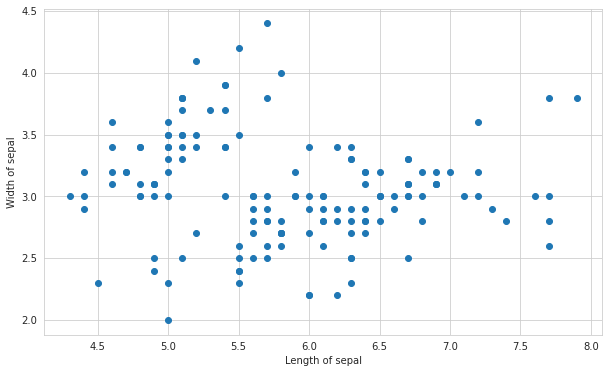

In [ ]:
#Plotting the Scatter Plot

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(data=X,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


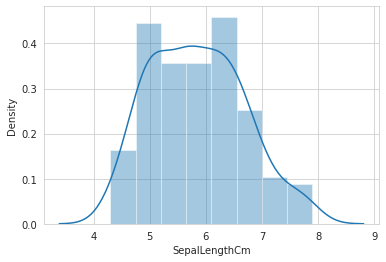

In [ ]:
# Standardization of variables
sns.distplot(df['SepalLengthCm']);

In [ ]:
# Scale the variables

X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

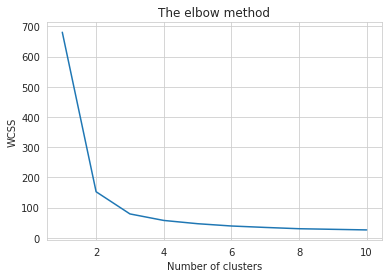

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


##  Based on the elbow curve 
## ploting the graph with 2 , 3 and 5 no. of clusters .

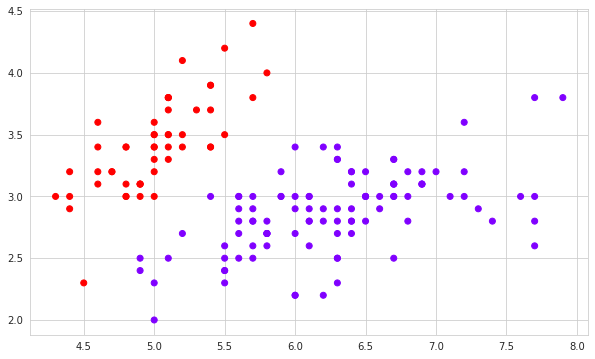

In [ ]:
# second cluster

kmeans_2 = KMeans(2)
kmeans_2.fit(X_scaled)

cl_2 = X.copy()

cl_2['pred'] = kmeans_2.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_2['SepalLengthCm'], cl_2['SepalWidthCm'], c= cl_2['pred'], cmap = 'rainbow');

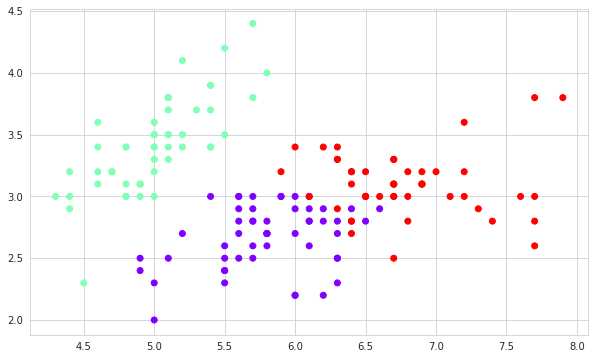

In [ ]:
# 3 cluster

kmeans_3 = KMeans(3)
kmeans_3.fit(X_scaled)

cl_3 = X.copy()

cl_3['pred'] = kmeans_3.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_3['SepalLengthCm'], cl_3['SepalWidthCm'], c= cl_3['pred'], cmap = 'rainbow');

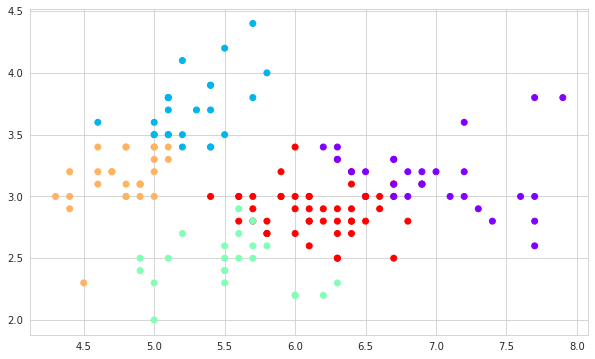

In [ ]:
#5 cluster

kmeans_5 = KMeans(5)
kmeans_5.fit(X_scaled)

cl_5 = X.copy()

cl_5['pred'] = kmeans_5.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_5['SepalLengthCm'], cl_5['SepalWidthCm'], c= cl_5['pred'], cmap = 'rainbow');



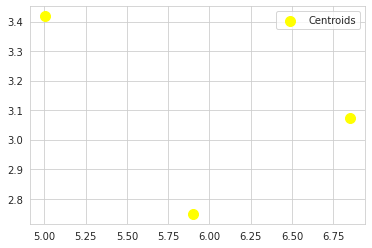

In [ ]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()